In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/rachelstumpf/ulmo/ulmo/utils/image_utils.py:8: UserWarning: healpy not installed.  Not all functions will work!
  warnings.warn("healpy not installed.  Not all functions will work!")


In [2]:
# SST_L3S_VIIRS table
# this contains instructions for what cutouts to create: it matches the VIIRS to L3S

l3s = pandas.read_parquet('/Users/rachelstumpf/SST_L3S_VIIRS.parquet')

In [3]:
gd_date = l3s.datetime <= pandas.Timestamp(datetime.datetime(2012, 2, 2))
df = l3s[gd_date]
# df['datetime']

In [4]:
pandas.set_option('display.max_colwidth', None)
# l3s.sort_values('datetime', ascending=True)[['datetime', 'ex_filename']]
# l3s[['VIIRS_datetime', 'lon', 'datetime']]

In [5]:
# tmp.parquet
# this is the temporary table that contains extracted info about each cutout 
# (basically the updated version of the L3S table)

tmp = pandas.read_parquet('/Users/rachelstumpf/ulmo/ulmo/runs/L3S/vet/tmp.parquet')

In [6]:
# tst.h5
# this is the extraction files. 'valid' is the temp arrays, 'valid_metadata' is the associated things to keep track of

file_path = '/Users/rachelstumpf/tst.h5'
with h5py.File(file_path, 'r') as h5_file:
    dataset = h5_file['valid']
    first_observation = dataset[0]

In [7]:
# keep only dates that are before or on 02-02-2012
pandas.reset_option('display.max_rows')
gd_date = l3s.datetime <= datetime.datetime(2012,2,2)
l3s_table = l3s[gd_date]

l3s_table[['VIIRS_datetime', 'datetime', 'ex_filename']]

,VIIRS_datetime,datetime,ex_filename
0,2012-02-01 00:10:00,2012-01-31 13:42:26,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1,2012-02-01 00:10:00,2012-01-31 13:44:47,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
2,2012-02-01 00:10:00,2012-01-31 13:49:19,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
3,2012-02-01 00:10:00,2012-01-31 13:46:48,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
4,2012-02-01 00:10:00,2012-01-31 13:44:00,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
...,...,...,...
1809,2012-02-02 23:40:00,2012-02-01 14:24:56,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1810,2012-02-02 23:40:00,2012-02-01 14:20:56,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1811,2012-02-02 23:40:00,2012-02-01 14:23:53,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1812,2012-02-02 23:40:00,2012-02-01 14:19:50,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc


In [8]:
# oh nevermind this is okay because they were all subtracted from 1:30am. So if we were setting
# each L3S cutout to be at 1:30 am, a lot of them would be shifted to an earlier day. I don't understand
# why we have no cutouts from 02-02-2012, unless they're out of order

l3s_table.sort_values('VIIRS_datetime')[['VIIRS_datetime', 'lon', 'datetime']]

# this makes sense, very low longitudes will be shifted earlier the most
# so there must just be a handicap with keeping observations on 02-02, since a lot of longitudes shift it to 02-01
# so why are there 1364 rows, but indexes from 0 to 1813??

,VIIRS_datetime,lon,datetime
0,2012-02-01 00:10:00,-176.89246,2012-01-31 13:42:26
18,2012-02-01 00:10:00,-169.23978,2012-01-31 14:13:02
17,2012-02-01 00:10:00,-169.06831,2012-01-31 14:13:44
16,2012-02-01 00:10:00,-168.31488,2012-01-31 14:16:44
15,2012-02-01 00:10:00,-168.89798,2012-01-31 14:14:24
...,...,...,...
1787,2012-02-02 23:40:00,-172.35194,2012-02-01 14:00:36
1786,2012-02-02 23:40:00,-172.05122,2012-02-01 14:01:48
1812,2012-02-02 23:40:00,-167.54140,2012-02-01 14:19:50
1797,2012-02-02 23:40:00,-175.37512,2012-02-01 13:48:30


In [9]:
# filter a new way and see if it gets same number of observations

l3s['date'] = pandas.to_datetime(l3s['datetime'])
l3s['date'] = l3s['date'].dt.date
l3s['date']

# Create a list of target dates
target_dates = pandas.to_datetime(['2012-01-31', '2012-02-01', '2012-02-02']).date

# Select rows where the date is in the target_dates list
selected_rows = l3s[l3s['date'].isin(target_dates)]

In [10]:
# try doing it where VIIRS_datetime and datetime must be on or before 02-02-2012

l3s['date'] = pandas.to_datetime(l3s['datetime'])
l3s['date'] = l3s['date'].dt.date
l3s['viirs_date'] = pandas.to_datetime(l3s['VIIRS_datetime'])
l3s['viirs_date'] = l3s['VIIRS_datetime'].dt.date

# Create a list of target dates
target_dates = pandas.to_datetime(['2012-01-31', '2012-02-01', '2012-02-02']).date

# Select rows where the date is in the target_dates list
subset = l3s[l3s['date'].isin(target_dates)]
subset2 = l3s[l3s['viirs_date'].isin(target_dates)]

In [11]:
# subset # there are 2215 L3S with before or on 02-02-2012
# subset2 # ahha! there are 1814 L3S AND viirs that are both on or before 02-02-2012
# but these go from index 0 to 1813
# WHERE IS THE 1364/1363 coming from ? 

In [12]:
# currently, l3s_table should be a section of subset2, examine what rows were not included in the l3s_table
# there should be 1814-1364 = 450

subset3 = subset2.drop(['viirs_date', 'date'], axis=1)
merged = subset3.merge(l3s_table, how='left', indicator=True)

rows_not_in_l3s_table = merged[merged['_merge'] == 'left_only']

In [13]:
# okay, there are 450, that's what we want to see, now what is special about them

rows_not_in_l3s_table[['VIIRS_datetime', 'lon', 'datetime']]

# 821-1341, 1470, 1583-1740, 1761-1770
# they are all observations where both VIIRS_datetime and datetime are on 2012-02-02,
# I wonder if the selection was that one of the them needs to be on or before and the other needs to be before
# either way, this probably isn't a huge issue bc when we actually do extraction it will be all observations

,VIIRS_datetime,lon,datetime
821,2012-02-02 00:20:00,46.846268,2012-02-02 04:37:23
822,2012-02-02 00:20:00,43.931595,2012-02-02 04:25:44
823,2012-02-02 00:20:00,42.944363,2012-02-02 04:21:47
824,2012-02-02 00:20:00,40.195263,2012-02-02 04:10:47
825,2012-02-02 00:20:00,42.008640,2012-02-02 04:18:02
...,...,...,...
1766,2012-02-02 22:40:00,41.425426,2012-02-02 04:15:42
1767,2012-02-02 22:40:00,40.560272,2012-02-02 04:12:14
1768,2012-02-02 22:40:00,41.287476,2012-02-02 04:15:09
1769,2012-02-02 22:40:00,41.149820,2012-02-02 04:14:36


In [14]:
# need to find the row that is in tmp.parquet and L3S_table, but not h5

pandas.reset_option('display.max_rows')
file_path = '/Users/rachelstumpf/tst.h5'
with h5py.File(file_path, 'r+') as h5_file:
    column_names = list(tmp.columns)
    target_dataset = h5_file['valid_metadata']
    df = pandas.DataFrame(target_dataset[:]).applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

    df.columns = column_names

    # display(df)

In [15]:
# find row that is missing from df

tmp['VIIRS_UID'] = tmp['VIIRS_UID'].astype('int64')
df['VIIRS_UID'] = df['VIIRS_UID'].astype('int64')
tmp_viirs_uid = tmp['VIIRS_UID']

tmp_other_cols = tmp.drop('VIIRS_UID', axis=1)

df_viirs_uid = df['VIIRS_UID']
df_other_cols = df.drop('VIIRS_UID', axis=1)

merged_viirs_uid = pandas.concat([tmp_viirs_uid, df_viirs_uid], axis=0)
merged_other_cols = pandas.concat([tmp_other_cols, df_other_cols], axis=0)

merged = pandas.concat([merged_viirs_uid, merged_other_cols], axis=1)

rows_not_in_df = tmp[~tmp['VIIRS_UID'].isin(df['VIIRS_UID'])]

rows_not_in_df

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction
1363,3792,2016,13281431436568436,561.341797,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,428893,2.869995,2.51001,0.359985,0,...,l3s_viirs,64,1356,0,2.963256,2.480011,3.549988,3.209991,2.799988,0.911621


In [16]:
tmp.iloc[1363] # the final row of tmp is the one that isn't in h5
df[df['VIIRS_UID'] == 13281431436568436] # does not exist in df 
tmp.iloc[1363][['VIIRS_datetime', 'lon', 'datetime']]

VIIRS_datetime    2012-02-02 23:40:00
lon                        -174.31564
datetime          2012-02-01 13:52:44
Name: 1363, dtype: object

In [17]:
# still don't know where the 1363/1364 is coming from
# maybe this is observations that are before or on 02-02-2012 in VIIRS but before 02-02-2012 in L3S

l3s['date'] = pandas.to_datetime(l3s['datetime'])
l3s['date'] = l3s['date'].dt.date
l3s['viirs_date'] = pandas.to_datetime(l3s['viirs_date'])
l3s['viirs_date'] = l3s['viirs_date'].dt.date

target_dates_viirs = pandas.to_datetime(['2012-01-31', '2012-02-01', '2012-02-02']).date
target_dates_l3s = pandas.to_datetime(['2012-01-31', '2012-02-01']).date

selected_rows = l3s[l3s['date'].isin(target_dates_l3s)]
selected_rows = selected_rows[selected_rows['viirs_date'].isin(target_dates_viirs)]

In [18]:
# work on that missing observation
# plot cloud cover and DT

tmp['T10'] = tmp['T10'] - 273.15
tmp['T90'] = tmp['T90'] - 273.15
tmp['DT'] = tmp['T90'] - tmp['T10']

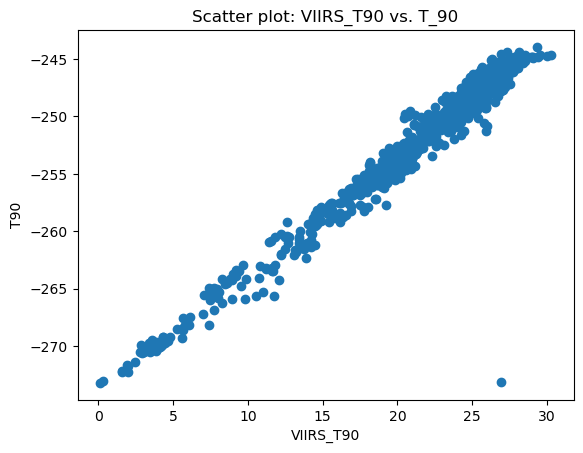

In [19]:
# plotting DT

plt.scatter(tmp['VIIRS_T90'], tmp['T90'])
plt.xlabel('VIIRS_T90')
plt.ylabel('T90')
plt.title('Scatter plot: VIIRS_T90 vs. T_90')
plt.show()

In [20]:
tmp[tmp['VIIRS_UID'] == 1328102862635982285]

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction,DT
27,2352,384,1328102862635982285,628.024536,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,466057,26.950012,26.600006,0.350006,0,...,64,-1,-1,0.0,0.0,0.0,-273.15,-273.15,0.0,0.0


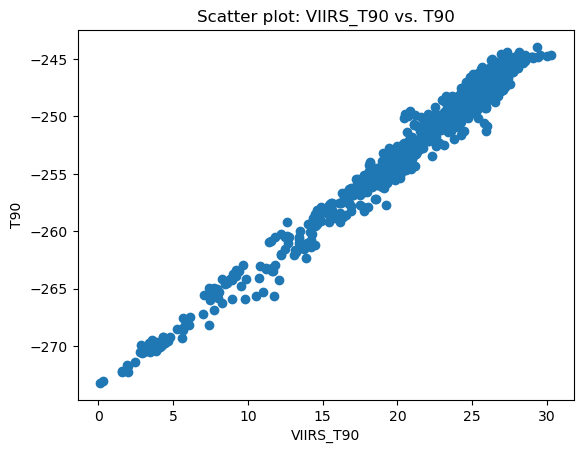

In [21]:
tmp2 = tmp.drop(tmp[tmp['VIIRS_UID'] == 1328102862635982285].index)
plt.scatter(tmp2['VIIRS_T90'], tmp2['T90'])
plt.xlabel('VIIRS_T90')
plt.ylabel('T90')
plt.title('Scatter plot: VIIRS_T90 vs. T90')
plt.show()

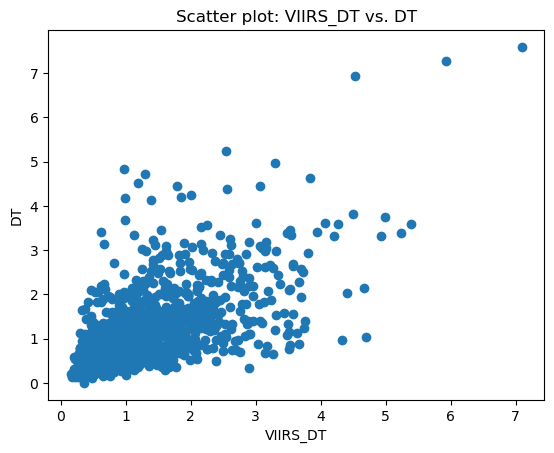

In [22]:
plt.scatter(tmp['VIIRS_DT'], tmp['DT'])
plt.xlabel('VIIRS_DT')
plt.ylabel('DT')
plt.title('Scatter plot: VIIRS_DT vs. DT')
plt.show()

In [23]:
# plot matching cutouts

# df is currently h5 metadata
# use VIIRS_UID 13282199753487854

pp_file = "s3://sst-l3s/PreProc/tst.h5"
pp_idx = 1099

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 198110 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]

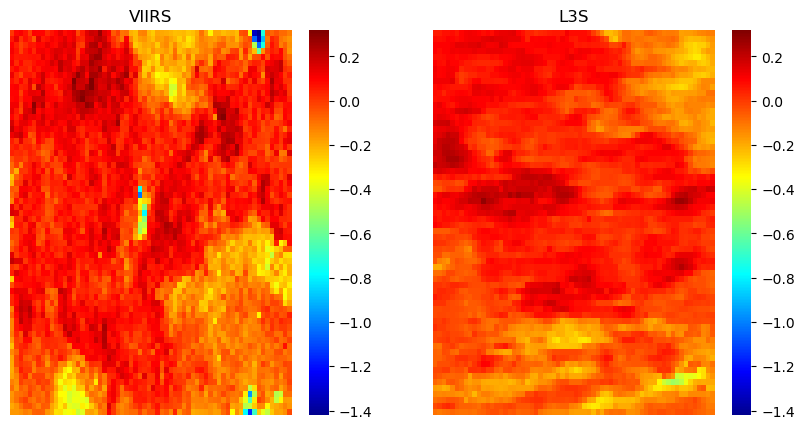

In [24]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [25]:
random_row = df.sample(n=1)

In [26]:
# generalize this so it selects directly from table and inputs equivalent values

pp_file = random_row['pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
#L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_row0 = np.fliplr(np.flipud(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = random_row['VIIRS_pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['VIIRS_pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]

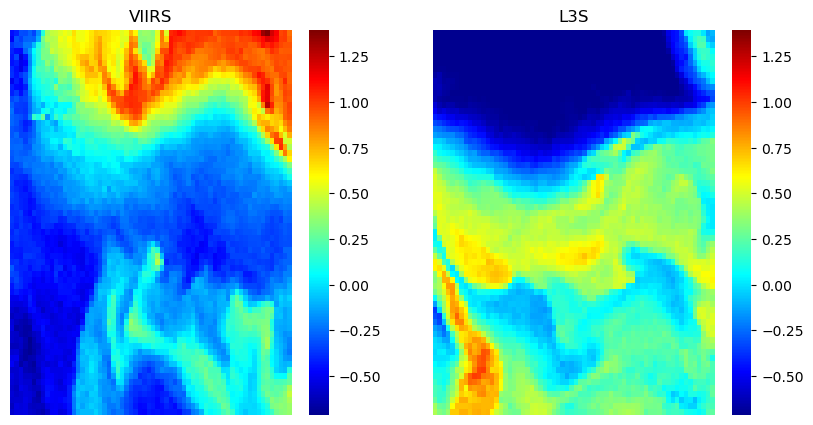

In [27]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

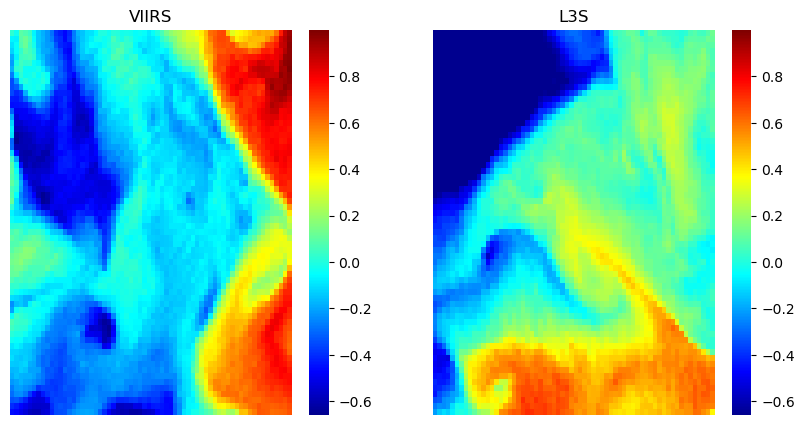

In [28]:
random_row = df.sample(n=1)
pp_file = random_row['pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
#L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_row0 = np.fliplr(np.flipud(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = random_row['VIIRS_pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['VIIRS_pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

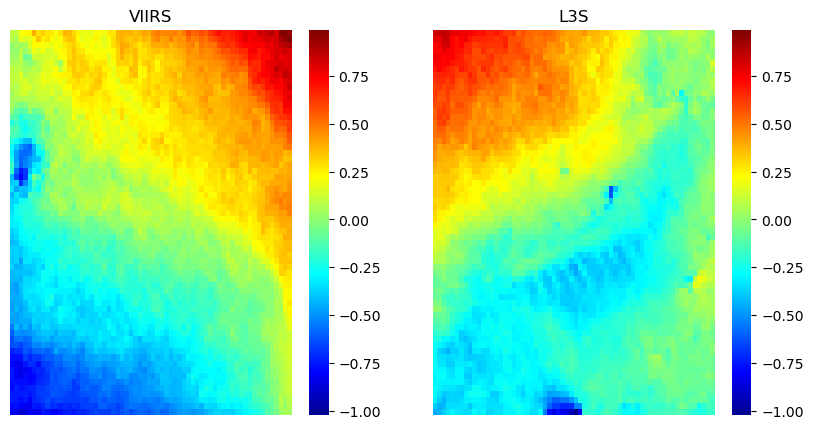

In [29]:
random_row = df.loc[df['VIIRS_UID'] == 13289236775686725]
pp_file = random_row['pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = random_row['VIIRS_pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['VIIRS_pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [30]:
df[['VIIRS_clear_fraction', 'clear_fraction']]

,VIIRS_clear_fraction,clear_fraction
0,0.007080078125001419,1.0
1,5.147249813874932e-17,1.0
2,0.003906250000000677,1.0
3,0.001085069444445127,1.0
4,0.015218098958332692,0.9521484375
...,...,...
1358,-1.5599681558083518e-15,0.703369140625
1359,-1.3650557102497704e-16,1.0
1360,0.007297092013888135,0.997802734375
1361,0.000813802083333117,1.0


In [31]:
# 2019
import ulmo
from ulmo.analysis import evaluate as ulmo_evaluate 
import datetime
from ulmo import io as ulmo_io
from ulmo.utils import catalog as cat_utils
import os
def check_files():
    l3s_table = pandas.read_parquet('/Users/rachelstumpf/SST_L3S_VIIRS.parquet')
    files_2019 = l3s_table[l3s_table['VIIRS_datetime'].dt.year == 2019]['VIIRS_UID']

    for file in files_2019:
        # Check if the file exists
        if os.path.exists(file):
            # Read the file
            with open(file, 'r'):
                data = ulmo.io.load_nc(file)
                
                # Check if the file has data
                has_data = False
                if data:
                    has_data = True

                print(f"File: {file}\nHas Data: {has_data}\n")
        else:
            print(f"File does not exist: {file}\n")

check_files()


OverflowError: fd is greater than maximum

In [33]:
l3s_2020 = pandas.read_parquet('/Users/rachelstumpf/SST_L3S_VIIRS_2020.parquet')
l3s_2020

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction,DT,LL
0,4944,2496,15771078748731224,663.987671,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,459197,27.579987,27.279999,0.299988,0,...,72202,0,27.377050,27.100006,27.609985,27.510010,27.269989,1.000000,0.240021,676.790161
1,4944,2592,15771077485669017,485.131348,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,530747,27.589996,27.299988,0.290009,0,...,170595,0,27.409035,26.989990,27.769989,27.600006,27.239990,1.000000,0.360016,613.258545
2,432,384,157711627212426227,274.428467,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,448193,23.940002,23.160004,0.779999,0,...,78787,0,23.238943,22.549988,24.649994,24.190002,22.779999,0.989502,1.410004,299.510193
3,624,1248,157711665001604272,216.976990,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,115602,24.420013,23.325970,1.094044,0,...,63548,0,24.184511,23.079987,24.880005,24.440002,23.839996,1.000000,0.600006,461.013550
4,816,960,157711824601844862,-28.293945,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,715485,22.429993,21.109985,1.320007,0,...,71163,0,22.648640,21.029999,23.880005,23.339996,21.459991,1.000000,1.880005,214.183228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339783,4656,1536,16098450293709003,853.048157,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,563682,26.429993,26.149994,0.279999,0,...,102119,0,26.106361,25.769989,26.459991,26.269989,25.940002,1.000000,0.329987,776.641907
339784,4656,2304,16098360993097266,475.981934,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,261183,26.910004,26.410004,0.500000,0,...,39267,0,26.590679,26.010010,27.179993,26.809998,26.230011,1.000000,0.579987,606.992554
339785,4752,2304,16098423453083992,456.985107,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,86198,26.779999,26.269989,0.510010,0,...,321815,0,26.425434,25.989990,26.980011,26.709991,26.170013,1.000000,0.539978,541.839966
339786,4656,2016,1609131969921983371,26.718384,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,428418,13.130005,12.170013,0.959991,0,...,275351,0,12.932873,12.109985,13.690002,13.450012,12.470001,0.733398,0.980011,252.962036


In [34]:
l3s_2020[['VIIRS_LL', "LL"]]

,VIIRS_LL,LL
0,663.987671,676.790161
1,485.131348,613.258545
2,274.428467,299.510193
3,216.976990,461.013550
4,-28.293945,214.183228
...,...,...
339783,853.048157,776.641907
339784,475.981934,606.992554
339785,456.985107,541.839966
339786,26.718384,252.962036


In [35]:
l3s = pandas.read_parquet('/Users/rachelstumpf/SST_L3S_VIIRS.parquet')
l3s

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,VIIRS_filename,VIIRS_ex_filename,VIIRS_lat,VIIRS_lon,row,col,lat,lon,datetime,ex_filename
0,3024,2784,13281093372310754,481.689453,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,32205,26.920013,26.429993,0.490021,0,...,s3://viirs/data/2012/032/20120201001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2012_95clear_192x192_inpaint.h5,19.337208,-176.892460,3533,155,19.337208,-176.892460,2012-01-31 13:42:26,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1,3120,2688,13281101161369470,360.780640,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,252131,26.670013,25.809998,0.860016,0,...,s3://viirs/data/2012/032/20120201001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2012_95clear_192x192_inpaint.h5,20.116112,-176.305300,3494,184,20.116112,-176.305300,2012-01-31 13:44:47,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
2,3216,2496,13281110096482976,496.087891,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,459126,26.359985,25.950012,0.409973,0,...,s3://viirs/data/2012/032/20120201001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2012_95clear_192x192_inpaint.h5,21.009575,-175.170240,3449,241,21.009575,-175.170240,2012-01-31 13:49:19,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
3,3216,2592,13281108764419858,454.589905,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,379958,26.309998,25.829987,0.480011,0,...,s3://viirs/data/2012/032/20120201001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2012_95clear_192x192_inpaint.h5,20.876402,-175.801420,3456,209,20.876402,-175.801420,2012-01-31 13:46:48,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
4,3216,2688,13281107257349902,326.442383,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,217941,26.359985,25.609985,0.750000,0,...,s3://viirs/data/2012/032/20120201001000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2012_95clear_192x192_inpaint.h5,20.725744,-176.500980,3463,174,20.725744,-176.500980,2012-01-31 13:44:00,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932447,4656,1536,16098450293709003,853.048157,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,563682,26.429993,26.149994,0.279999,0,...,s3://viirs/data/2020/366/20201231225000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2020_95clear_192x192_inpaint.h5,-5.497077,-142.909970,4774,1854,-5.497077,-142.909970,2020-12-30 15:58:22,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2020/366/20201231120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
2932448,4656,2304,16098360993097266,475.981934,s3://viirs/PreProc/VIIRS_2020_95clear_192x192_preproc_viirs_std.h5,261183,26.910004,26.410004,0.500000,0,...,s3://viirs/data/2020/366/20201231225000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc,s3://viirs/Extractions/VIIRS_2020_95clear_192x192_inpaint.h5,-6.390067,-149.027340,4819,1548,-6.390067,-149.027340,2020-12-30 15:33:53,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2020/366/20201231120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
2932449,4752,2304,16098423453083992,456.985107,s

In [2]:
day133 = xarray.open_dataset('/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2019/133/20190513120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc')

In [3]:
day133

<xarray.Dataset>
Dimensions:                  (lat: 9000, lon: 18000, time: 1)
Coordinates:
  * lat                      (lat) float32 89.99 89.97 89.95 ... -89.97 -89.99
  * lon                      (lon) float32 -180.0 -180.0 -179.9 ... 180.0 180.0
  * time                     (time) datetime64[ns] 2019-05-13T12:00:00
Data variables: (12/17)
    sea_surface_temperature  (time, lat, lon) float32 ...
    sses_bias                (time, lat, lon) float32 ...
    sses_standard_deviation  (time, lat, lon) float32 ...
    l2p_flags                (time, lat, lon) int16 ...
    l3s_flags                (time, lat, lon) float32 ...
    sst_count                (time, lat, lon) float32 ...
    ...                       ...
    wind_speed               (time, lat, lon) float32 ...
    sst_dtime                (time, lat, lon) timedelta64[ns] ...
    measurement_dtime        (time, lat, lon) timedelta64[ns] ...
    crs                      int32 ...
    sst_gradient_magnitude   (time, lat, lon) float32 ...
    sst_front_position       (time, lat, lon) float32 ...
Attributes: (12/54)
    collation_version:          2.7.0
    start_time:                 20190513T000000Z
    time_coverage_start:        20190513T000000Z
    stop_time:                  20190513T235959Z
    time_coverage_end:          20190513T235959Z
    date_created:               20220711T171511Z
    ...                         ...
    geospatial_lon_min:         -179.99
    geospatial_lon_max:         179.99
    geospatial_lat_min:         -89.99
    geospatial_lat_max:         89.99
    netcdf_version_id:          4.7.4
    uuid:                       a57003be-09dc-48ef-b9ba-92b575401738

In [ ]:
cutouts = []
for _, row in l3s.iterrows():
    lat = float(row['lat'])
    lon = float(row['lon'])

    # Find the nearest latitude and longitude in the day133 dataset
    nearest_lat = day133['lat'].sel(lat=lat, method='nearest')
    nearest_lon = day133['lon'].sel(lon=lon, method='nearest')

    # Extract the 64x64 pixel cutout centered at the latitude and longitude
    y_start = int(nearest_lat.item()) - 32
    y_end = int(nearest_lat.item()) + 32
    x_start = int(nearest_lon.item()) - 32
    x_end = int(nearest_lon.item()) + 32

    cutout = day133.sel(lat=slice(y_start, y_end), lon=slice(x_start, x_end))
    cutouts.append(cutout)

# Verify the number of cutouts
print("Number of cutouts:", len(cutouts))